# Basketball Analytics: Clustering Players by Performance Metrics

![basketball through net](basketball.jpg)

In the realm of professional basketball analysis, particularly focusing on the National Basketball Association (NBA), there's a keen interest in dissecting and comprehending the nuances of player performances. As part of a sports analytics squad, your mission is to delve into a detailed clustering study, leveraging hierarchical clustering techniques, tidyverse function writing skills, and data visualization to unearth patterns among players based on key performance metrics.

Basketball, a global sport teeming with rich and varied player data, offers a goldmine of insights into individual skills and overall team dynamics. To channel your analysis effectively, you've chosen to narrow down on a dataset created using overall season statistics from Sports Reference for 50 NBA players encapsulating a range of performance indicators:

`nba_players_2023.csv` encompasses specific performance metrics for each player, outlined as follows:

| Variable                | Description                                  |
|-------------------------|----------------------------------------------|
| `name`                  | The player's full name                       |
| `age`                   | The player's age during the season           |
| `minutes_per_game`      | Average duration of play per game in minutes |
| `rebounds_per_game`     | Average number of rebounds per game          |
| `assists_per_game`      | Average number of assists per game           |
| `points_per_game`       | Average number of points scored per game     |

In [1]:
install.packages("dendextend")
install.packages("cluster")

# Import packages
library(readr)
library(dendextend)
library(tibble)
library(dplyr)
library(purrr)
library(cluster)
library(ggplot2)

# Downloading packages -------------------------------------------------------
- Downloading dendextend from CRAN ...          OK [3.7 Mb in 0.88s]
- Downloading viridis from CRAN ...             OK [2.9 Mb in 1.0s]
Successfully downloaded 2 packages in 3 seconds.

The following package(s) will be installed:
- dendextend [1.17.1]
- viridis    [0.6.5]
These packages will be installed into "~/renv/library/R-4.2/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing viridis ...                        OK [installed binary and cached in 1.2s]
- Installing dendextend ...                     OK [installed binary and cached in 1.3s]
# Downloading packages -------------------------------------------------------
- Downloading cluster from CRAN ...             OK [548.5 Kb in 0.59s]
Successfully downloaded 1 package in 0.76 seconds.

The following package(s) will be installed:
- cluster [2.1.6]
These packages will be installed into "~/re


---------------------
Welcome to dendextend version 1.17.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
nba <- read_csv(paste0("nba_players_2023.csv")) %>% 
mutate(combined = rebounds_per_game + assists_per_game + points_per_game) %>% 
column_to_rownames("name")

View(nba)

#normalizing the data
nba_scaled <- scale(nba)

Rows: 50 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): name
dbl (5): age, minutes_played_per_game, rebounds_per_game, assists_per_game, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,age,minutes_played_per_game,rebounds_per_game,assists_per_game,points_per_game,combined
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Admiral Schofield,25,12.2,1.7,0.8,4.2,6.7
Damian Lillard,32,36.3,4.8,7.3,32.2,44.3
Daniel Gafford,24,20.6,5.6,1.1,9.0,15.7
Devin Booker,26,34.6,4.5,5.5,27.8,37.8
Dru Smith,25,9.1,1.5,1.7,3.3,6.5
Eugene Omoruyi,25,11.8,2.3,0.5,4.9,7.7
Giannis Antetokounmpo,28,32.1,11.8,5.7,31.1,48.6
Immanuel Quickley,23,28.9,4.2,3.4,14.9,22.5
Jae Crowder,32,18.9,3.8,1.5,6.9,12.2


    k tot_withins
1   1   294.00000
2   2   123.86279
3   3    95.91398
4   4    80.34514
5   5    59.74987
6   6    64.66472
7   7    43.92490
8   8    42.10635
9   9    46.60750
10 10    35.11404


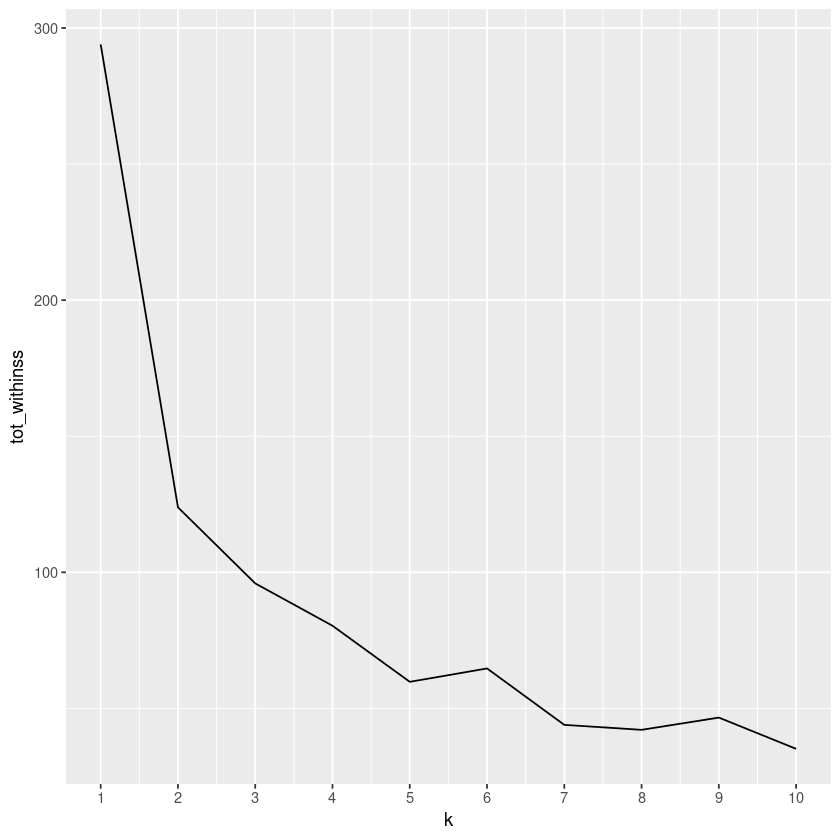

In [3]:
## Elbow Plot

tot_withinss <- map_dbl(1:10, function(k){
	model <- kmeans(x = nba_scaled, centers = k)
	model$tot.withinss
})

elbow_df <- data.frame(
		k = 1:10,
		tot_withins = tot_withinss
	)

print(elbow_df)

ggplot(elbow_df, aes(x = k, y = tot_withinss)) + geom_line() + scale_x_continuous(breaks = 1:10)

num_clusters <- 2

In [5]:
#Calculating distance and clustering 
nba_dist <- dist(nba_scaled, method = 'euclidean')

hc_nba <- hclust(nba_dist, method = 'average')


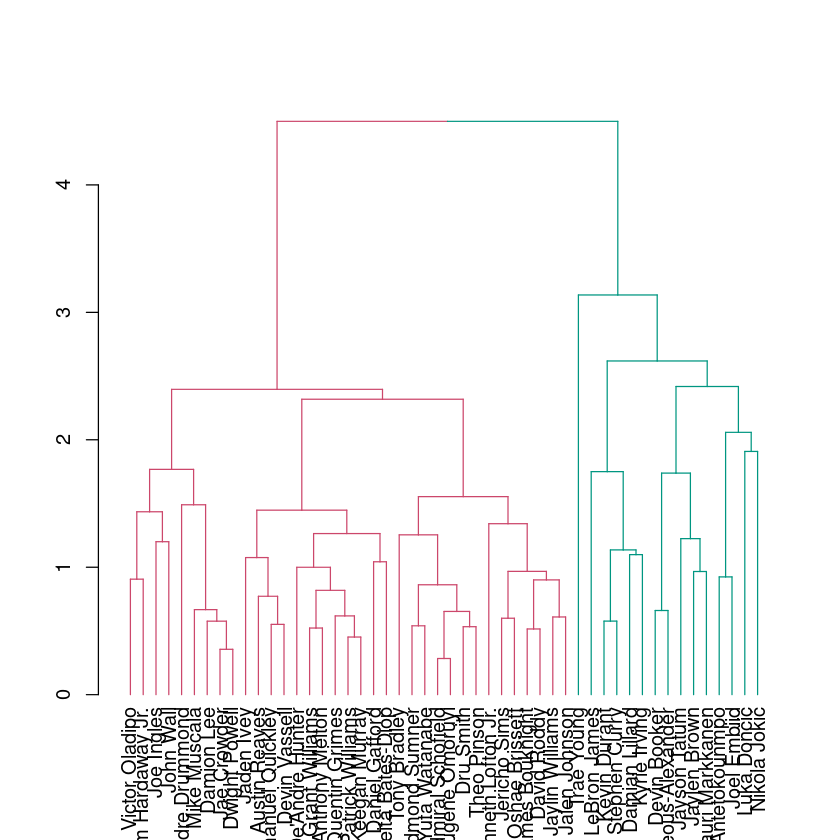

In [9]:
# Building a dendogram
dend_nba <- as.dendrogram(hc_nba)
dend_colored <- color_branches(dend_nba, k = num_clusters)
plot(dend_colored)

In [11]:
# Assigning clusters and segmenting data

cut_nba <- cutree(hc_nba, h = 3.5) # based on the dendogram
clust_nba <- mutate(nba, cluster = cut_nba)

In [12]:
# Analysing clusters and specifying the features of strongest influence

# by age
clust_nba %>%
	group_by(factor(cut_nba)) %>%
	summarize(mean = mean(age),
			 sd = sd(age),
			 median = median(age),
			 min = min(age),
			 max = max(age))

factor(cut_nba),mean,sd,median,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25.48571,3.995375,25,20,35
2,28.20000,4.491261,27,23,38


In [16]:
# by minutes played
clust_nba %>%
	group_by(factor(cut_nba)) %>%
	summarize(mean = mean(minutes_played_per_game),
			 sd = sd(minutes_played_per_game),
			 median = median(minutes_played_per_game),
			 min = min(minutes_played_per_game),
			 max = max(minutes_played_per_game))

factor(cut_nba),mean,sd,median,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20.08571,7.913434,19.2,2.8,31.7
2,35.21333,1.320101,35.5,32.1,37.4
